<a href="https://colab.research.google.com/github/Shahnaj1/CoinMonitor/blob/main/MultiRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df_index=pd.read_csv("economic_index.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
## drop unneccessary columns

df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)


In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
## check null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


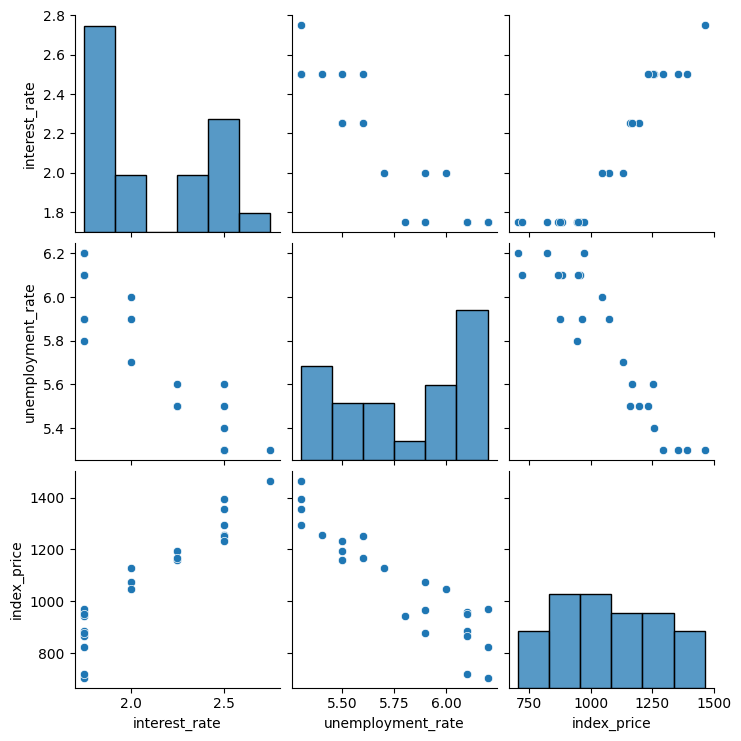

In [8]:
## Let's do some visualization

import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

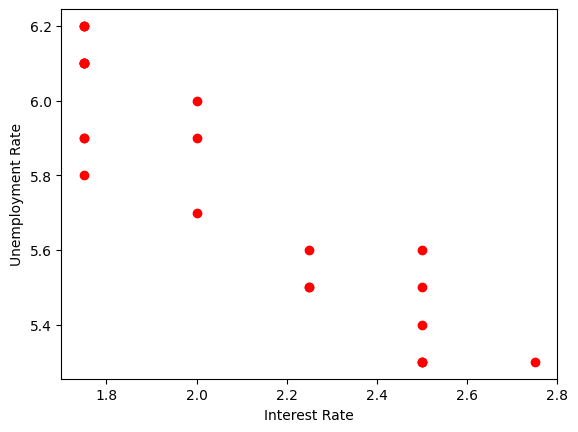

In [10]:
##visualize the data ponts more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [11]:
## independent and dependent features
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [12]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [14]:
## Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


<Axes: xlabel='interest_rate', ylabel='index_price'>

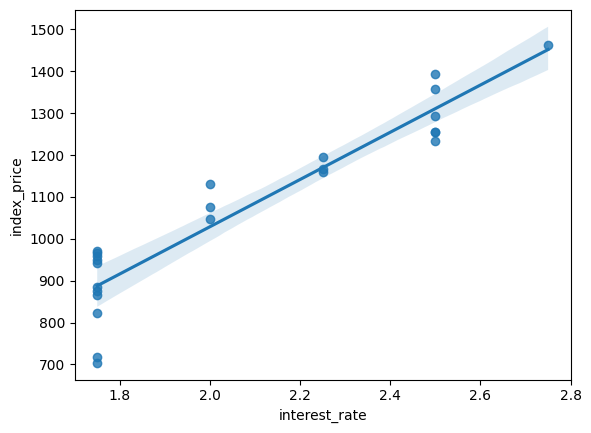

In [15]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

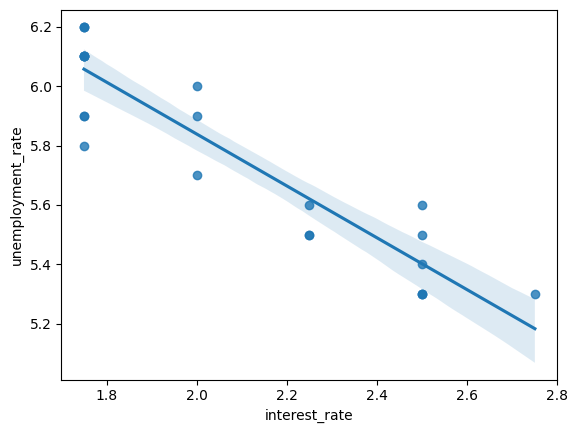

In [16]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

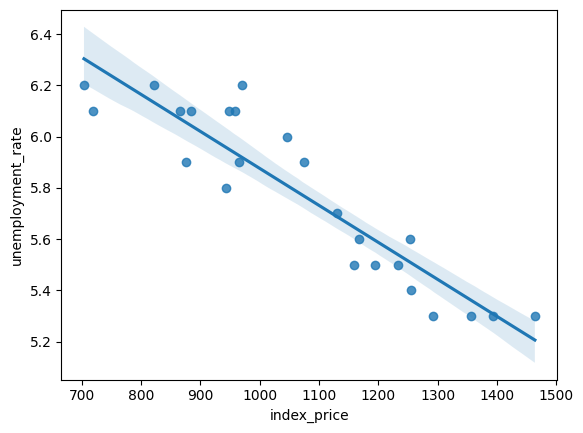

In [17]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [18]:
## standard scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [22]:
## Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train_scaled,y_train,scoring='neg_mean_squared_error',cv=10)

In [24]:
np.mean(scores)

-5277.652191996395

In [25]:
## Prediction

y_pred=model.predict(x_test_scaled)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [29]:
## Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

MSE: 5793.762887712569
MAE: 59.935781523235484
RMSE: 76.11677139574805


In [30]:

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8278978091457145

In [31]:
adj_r_score=1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adj_r_score

0.7131630152428576

In [32]:
print(adj_r_score)

0.7131630152428576


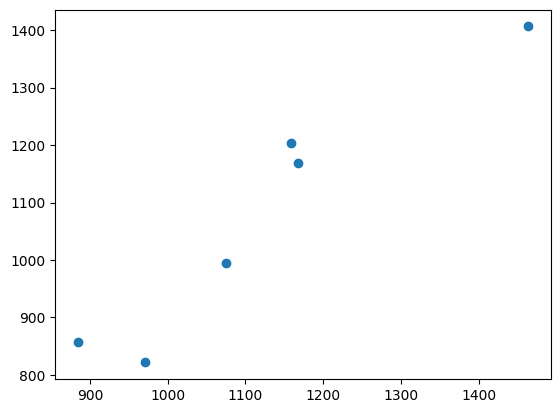

In [33]:
## Assumptions
plt.scatter(y_test,y_pred)

In [34]:
residuals=y_test-y_pred
residuals

,index_price
8,-45.227704
16,149.349481
0,57.486996
18,26.291104
11,80.090077
9,-1.169327


<ipython-input-35-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='index_price', ylabel='Density'>

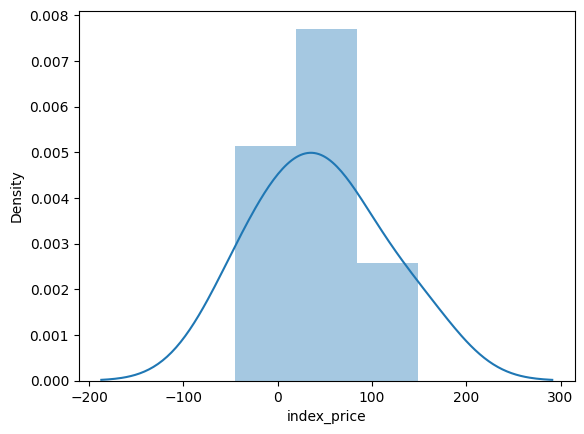

In [35]:
sns.distplot(residuals)

In [ ]:
## scatter plot wrt predictions and residuals

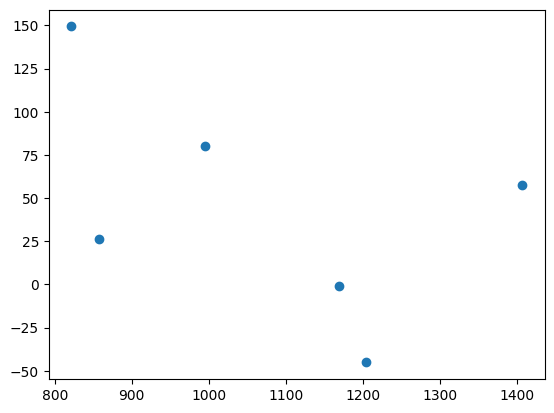

In [36]:
plt.scatter(y_pred,residuals)

In [37]:
## OLS Linear Regression

import statsmodels.api as sm
x_train_sm=sm.add_constant(x_train_scaled)
model=sm.OLS(y_train,x_train_sm)
model.fit().summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.50e-08
Time:                        05:32:35   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.4444     16.941     62.183      0.000    1017.336    1089.553
x1            88.2728     42.263      2.089      0.054      -1.810     178.355
x2          -116.2572     42.263     -2.751      0.015    -206.340     -26.175
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""